# Seaborn

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Setup the style
sns.set_style(
    'darkgrid'
)

In [2]:
# DataSet
tips = sns.load_dataset('tips')

In [4]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [22]:
h = 0
m = 0

for i in range(0,len(tips['sex'])):
    
    if tips['sex'][i] == 'Male':
        h += 1
    else:
        m += 1
print(
    'mulher : %3.0f\n'%m,
    'homem : %3.0f\n'%h,
    'total : %3.0f'%(h+m)
)

mulher :  87
 homem : 157
 total : 244


## KDE - Kernel Densit Estimate

Create one gaussian for each histogram and then sum all

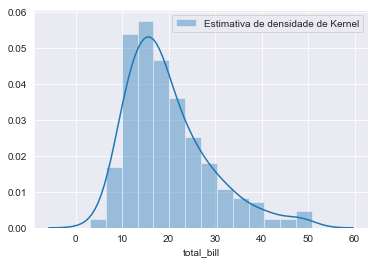

In [26]:
sns.distplot(
    a = tips['total_bill'],
    label = 'Estimativa de densidade de Kernel'
)
plt.legend();
# plt.savefig('./xxxx')

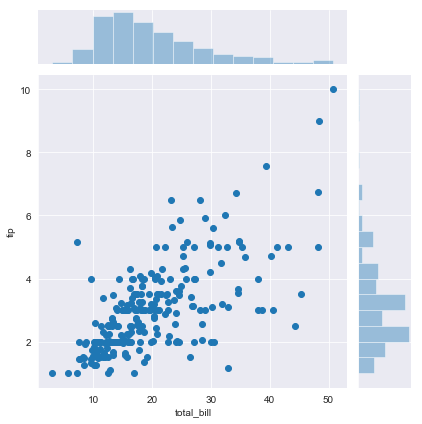

In [28]:
sns.jointplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
);

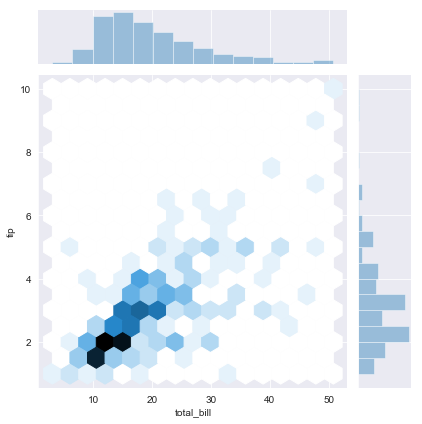

In [29]:
sns.jointplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    kind='hex'
);

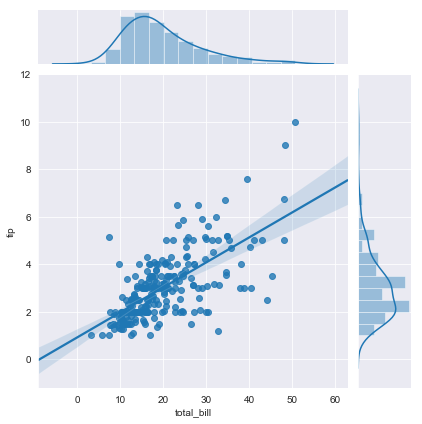

In [30]:
sns.jointplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    kind='reg'
);

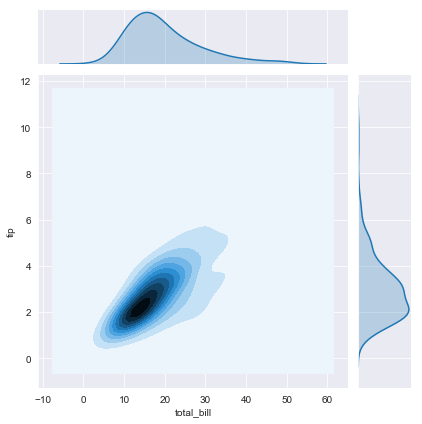

In [31]:
sns.jointplot(
    x = 'total_bill',
    y = 'tip',
    data = tips,
    kind = 'kde'
);

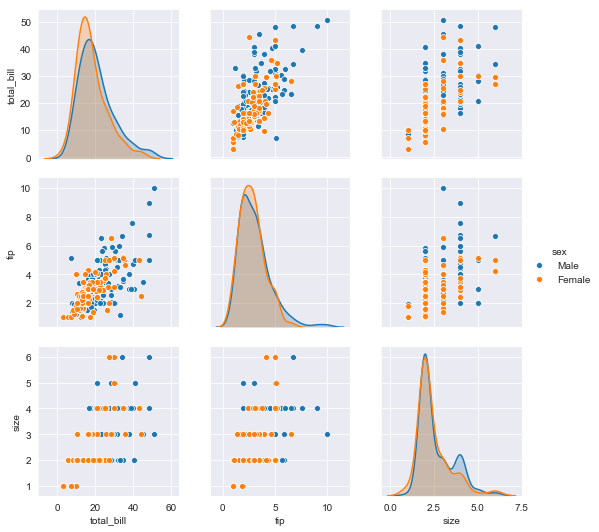

In [33]:
sns.pairplot(
    tips,
    hue='sex' # comparison argument
);

### Pandas dataframe opened in SNS

In [47]:
data1 = {
    'idade':[1,2,1,3,4],
    'gasto':[100,300,200,90,100]
}

df = pd.DataFrame(data=data1)


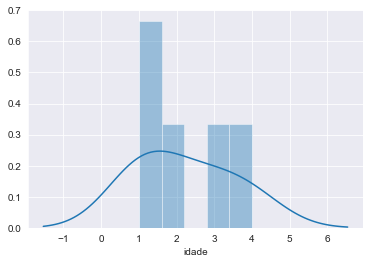

In [49]:
sns.distplot(
    df['idade'],
    bins=5
)

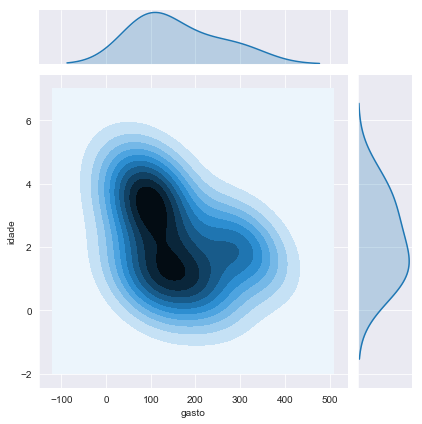

In [54]:
sns.jointplot(
    x='gasto',
    y='idade',
    data=df,
    kind='kde'
)

### Barplot()

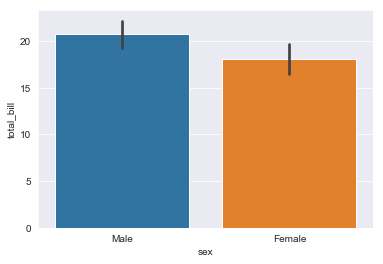

In [56]:
sns.barplot(
    x = 'sex',
    y = 'total_bill',
    data = tips
);

### Countplot()

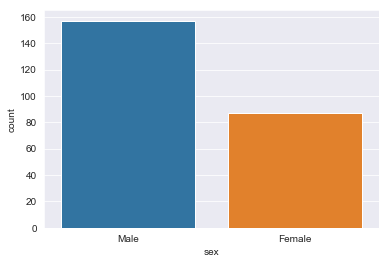

In [59]:
sns.countplot(
    x = 'sex',
    data = tips
);

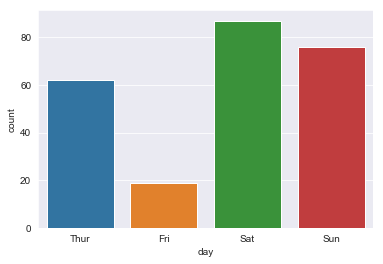

In [60]:
sns.countplot(
    x = 'day',
    data = tips
);

### BoxPlot()

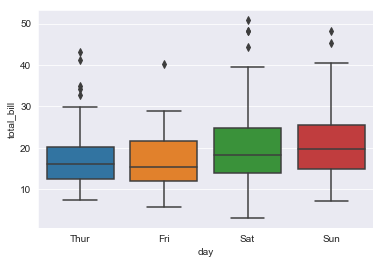

In [61]:
sns.boxplot(
    x = 'day',
    y = 'total_bill',
    data = tips
);

In [ ]:
# Exemple of how remove some unwanted dates
# using pandas apply()

In [130]:
tips['day'].unique()
media = {}
for day in tips['day'].unique():
    media[day] = tips[ tips['day']== day]['total_bill'].mean()
media

{'Sun': 20.49105263157895,
 'Sat': 19.177649623464127,
 'Thur': 16.10699531737773,
 'Fri': 15.940083102493073}

In [131]:
# Briefly, I take Bill's values ... I filter by DAYS and put an average value

# fool way
"""media = {
'Thur':tips[ tips['day']== 'Thur']['total_bill'].mean(),
'Fri':tips[ tips['day']== 'Fri']['total_bill'].mean(),
'Sat':tips[ tips['day']== 'Sat']['total_bill'].mean(),
'Sun':tips[ tips['day']== 'Sun']['total_bill'].mean()
}"""
# better way
tips['day'].unique()
media = {}
for day in tips['day'].unique():
    media[day] = tips[ tips['day']== day]['total_bill'].mean()


def f(x):
    day = x[0]
    bill = x[1]
    
    if day == 'Thur' and bill > 30:
        return media['Thur']
    if day == 'Fri' and bill > 30:
        return media['Fri']
    if day == 'Sat' and bill > 40:
        return media['Sat']
    if day == 'Sun' and bill > 40:
        return media['Sun']
    
    return bill

In [132]:
tips['total_bill'] = tips[['day','total_bill']].apply(f,axis=1);



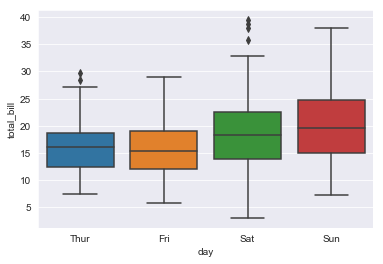

In [133]:
sns.boxplot(
    x = 'day',
    y = 'total_bill',
    data = tips,
    #hue = 'smoker'
);

# See the difference now

### Matrix Plots

In [110]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [111]:
# Correlation Datas
tc = tips.corr()

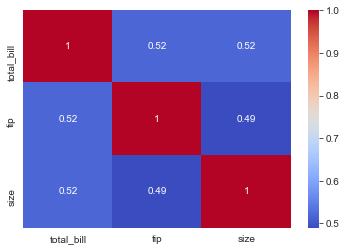

In [134]:
sns.heatmap(
    tc,
    annot=True,
    cmap = 'coolwarm'
);

In [118]:
fly = sns.load_dataset('flights')
fly.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [119]:
fp =fly.pivot_table(
    index='month',
    columns='year',
    values='passengers'
)
fp.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419


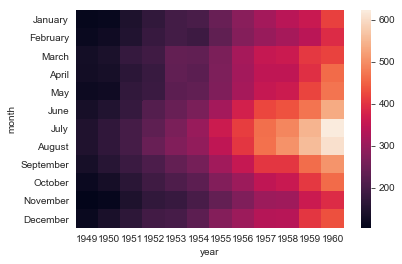

In [121]:
sns.heatmap(fp);

### Aplication with corr() + heatmap()

### Check if has None elements

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [6]:
titanic.isnull().head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# We can check if we are losing some
# information.

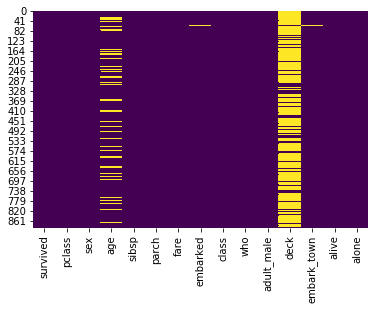

In [13]:
sns.heatmap(
    titanic.isnull(),
    #yticklabels = False,
    cbar = False,# Use to avoid warnings
    cmap= 'viridis'
);

### Clustermap( )

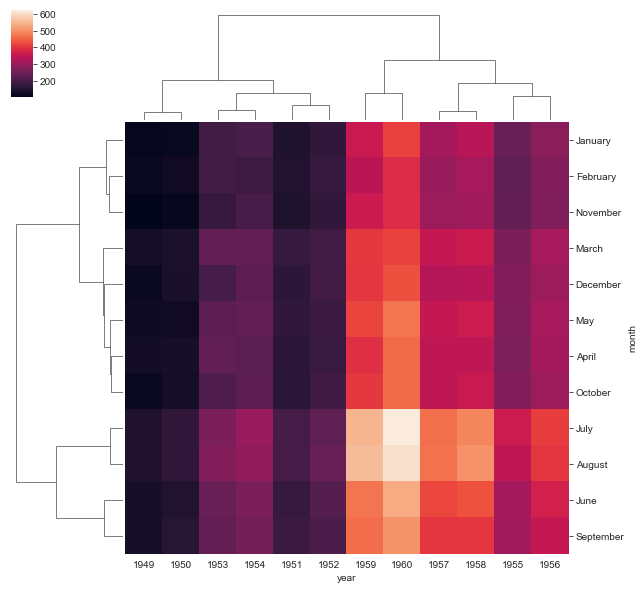

In [123]:
sns.clustermap(
    fp
);

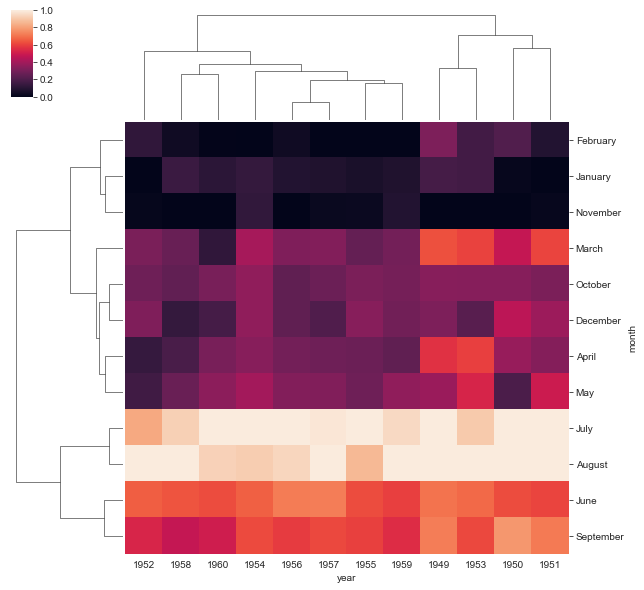

In [127]:
sns.clustermap(
    fp,
    standard_scale=1,#rows=0 columns=1
);

### Regressions Plot

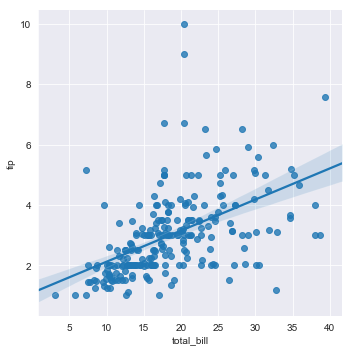

In [136]:
sns.lmplot(
    x ='total_bill',
    y = 'tip',
    data = tips
);

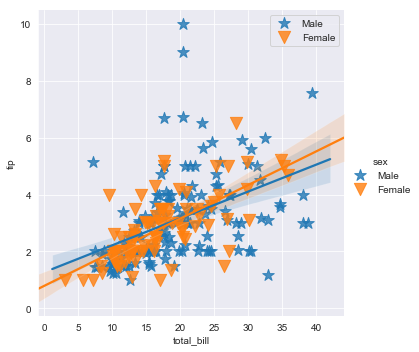

In [141]:
#hue = comparar
sns.lmplot(
    x='total_bill',
    y='tip',
    data = tips,
    hue ='sex',#Compara
    markers = ['*','v'],#Muda o plot
    scatter_kws = {'s':150}#Aumenta o tamanho
)
plt.legend();